In [9]:
!pip install geopandas
!pip install fiona
!pip install shapely
!pip install pyproj

In [5]:
import geopandas as gpd
shapefile_path = './Ejercicio_pobreza/Departamento_INEI_2017.shp'
departamentos = gpd.read_file(shapefile_path)

# Mostrar la primera fila del DataFrame
print(departamentos.head())

   fid  objectid ccdd   nombdep                     fuente tematica  \
0  1.0         1   01  AMAZONAS  INEI - CPV2017 RESULTADOS      T10   
1  2.0         2   02    ANCASH  INEI - CPV2017 RESULTADOS      T10   
2  3.0         3   03  APURIMAC  INEI - CPV2017 RESULTADOS      T10   
3  4.0         4   04  AREQUIPA  INEI - CPV2017 RESULTADOS      T10   
4  5.0         5   05  AYACUCHO  INEI - CPV2017 RESULTADOS      T10   

   id_geograf                                           geometry  
0     2010000  POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...  
1     2020000  POLYGON ((-77.64692 -8.05086, -77.64669 -8.052...  
2     2030000  POLYGON ((-73.74632 -13.17456, -73.74570 -13.1...  
3     2040000  POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...  
4     2050000  POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...  


In [8]:
import pandas as pd

# Cargar los datos tabulares de pobreza por departamento desde el CSV
csv_path = './Ejercicio_pobreza/pobreza_departamental1.csv'


#csv_path = '/content/drive/My Drive/QGIS_QLAB/Sesion3/Ejercicio_pobreza/pobreza_departamental1.csv'
pobreza_df = pd.read_csv(csv_path)

# Mostrar la primera fila del DataFrame
print(pobreza_df.head())

   coddepa   nombdep  pobre2004  pobre2014  pobre2019  pobre2023
0        1  AMAZONAS   0.714886   0.513110   0.304887   0.257683
1        2    ANCASH   0.622374   0.239426   0.175417   0.249626
2        3  APURIMAC   0.703740   0.425874   0.290863   0.258065
3        4  AREQUIPA   0.399528   0.077723   0.060091   0.138672
4        5  AYACUCHO   0.724280   0.473691   0.393552   0.393972


### Visualizing Poverty Data in 2014 with GeoPandas and Matplotlib

We first load and merge a shapefile of Peruvian departments (`departamentos`) with a DataFrame containing poverty data (`pobreza_df`) based on a common column `coddepa`. The merged GeoDataFrame, `mapa`, is then used to generate a choropleth map, visualizing poverty rates in 2014 using a red color gradient (`Reds`). The map includes a vertical legend on the right side, with the size of the legend shrunk to 50% for better fitting. The axes are turned off to provide a cleaner visualization.

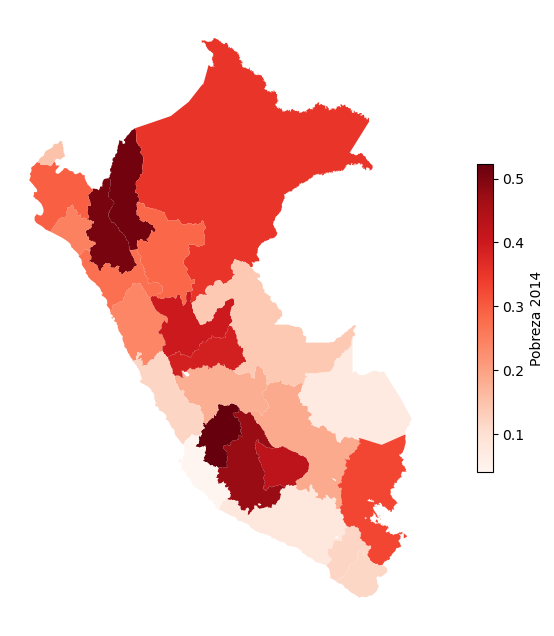

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Pobreza 2014
departamentos['coddepa'] =   departamentos['fid']
mapa = departamentos.merge(pobreza_df, on = 'coddepa')

#   Mapa
mapa.plot(column='pobre2014',
          cmap = 'Reds',
          legend = True,
          legend_kwds={'label': "Pobreza 2014",
                       'orientation': "vertical",
                       'location': 'right',
                       'shrink': 0.5 },
          figsize=(12,8)).set_axis_off()


### Assigning Geometries to ENAHO Data and Plotting Spatial Information

In this section, we load the ENAHO 2017 dataset (`enaho2017.csv`) from a specified directory and assign geometries to the data by converting latitude and longitude columns into point geometries. Using `GeoPandas`, we create a GeoDataFrame (`enaho_xy`) with these point geometries in the WGS84 coordinate system (`EPSG:4326`). We also re-project the departmental boundaries (`depa_wgs`) to the same coordinate system for reference. Finally, we plot the departmental boundaries with black edges and overlay the ENAHO data as points on the map. The points are plotted with blue edges and no fill to distinguish them clearly, and the axes are turned off for a cleaner map visualization.


Uso la función GeoDataFrame para proyectar en geometría. 
Variable x: longitud 
variable y: latitud 

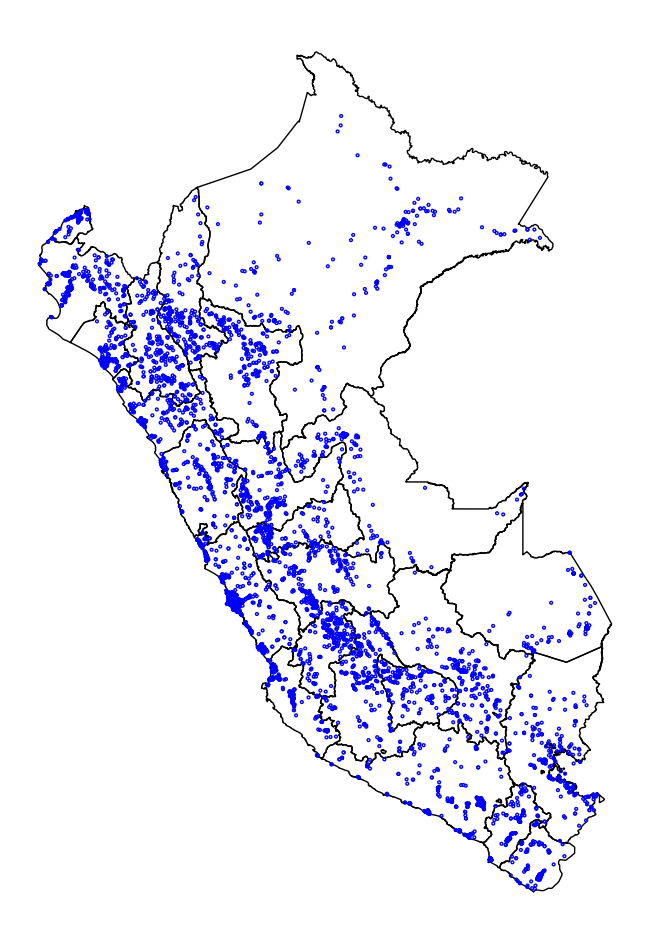

In [13]:
# AHORA REALIZAREMOS LOS EJERCICIOS DE ASIGNAR GEOMETRÍA: ENAHO

  # Primero enaho
 
dir = './Ejercicio_geometria'

enaho = pd.read_csv(dir + '/enaho2017.csv')

#   Asignar geometría
enaho_xy = gpd.GeoDataFrame(geometry = gpd.points_from_xy(
    enaho.longitud,
    enaho.latitud,
    crs="EPSG:4326"), data = enaho)
    
#   Limites departamentales para referencia (cargamos anteriormente)
depa_wgs = departamentos.to_crs("EPSG:4326")

#   Mapa
capa1 = depa_wgs.plot(color = 'none', edgecolor = 'black', figsize=(16,12))
enaho_xy.plot(ax = capa1,
              marker = 'o',
              edgecolor = 'blue',
              facecolors = 'none',
              markersize = 4,
              legend = True).set_axis_off()




   item riesgo_salud riesgo_seguridad riesgo_ambiental      este      norte  \
0     1         Bajo            Medio             Bajo  251587.0  9564586.0   
1     2         Bajo             Bajo             Bajo  251483.0  9564735.0   
2     3         Bajo             Bajo             Bajo  540539.0  9591532.0   
3     4         Bajo             Bajo             Bajo  538463.0  9593444.0   
4     5         Bajo             Bajo             Bajo  538364.0  9593379.0   

   zona      lote departamento              provincia  distrito  
0    18  Sin Lote       Loreto      Dátem del Marañón    Morona  
1    18  Sin Lote       Loreto      Dátem del Marañón    Morona  
2    17       XX        Tumbes  Contralmirante Villar  Zorritos  
3    17       XX        Tumbes  Contralmirante Villar  Zorritos  
4    17       XX        Tumbes  Contralmirante Villar  Zorritos  


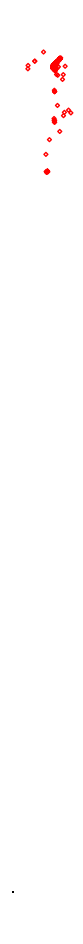

In [14]:
# AHORA REALIZAREMOS LOS EJERCICIOS DE ASIGNAR GEOMETRÍA: PAH (pasivos ambientales)
# Forma incorrecta asumiendo que todo es zona 18s

# PAH
pah = pd.read_csv(dir + r'/pamhf.csv', sep = ";")
print(pah.head())

#   Asignar geometría
pah_xy = gpd.GeoDataFrame(geometry = gpd.points_from_xy(
    pah.este,
    pah.norte,
    crs = 'EPSG:32718'), data = pah)

# Limides depa a UTM
depa_UTM = departamentos.to_crs("epsg:32718")

#   Mapa
capa1 = depa_wgs.plot(color = 'none', edgecolor = 'black', figsize=(16,12))
pah_xy.plot(ax = capa1,
              marker = 'D',
              edgecolor = 'red',
              facecolors = 'none',
              markersize = 4,
              legend = True).set_axis_off()


### Visualizing Environmental Liabilities (PAH) by Zones and Reprojection

In this section, we load the environmental liabilities data (`pamhf.csv`) and filter it by three geographic zones: 17, 18, and 19. Using `GeoPandas`, we convert the coordinates (`este` and `norte`) from each zone into point geometries using the appropriate UTM projections for each zone (EPSG:32717, EPSG:32718, and EPSG:32719). Afterward, we re-project the points from zone 17 and 19 to match the UTM 18S projection (`EPSG:32718`) for consistency. We concatenate the data for all three zones into a unified GeoDataFrame (`PAH_f`). Finally, we plot the departmental boundaries in UTM projection and overlay the PAH points using red diamond markers, with the axes turned off to produce a clean visualization.


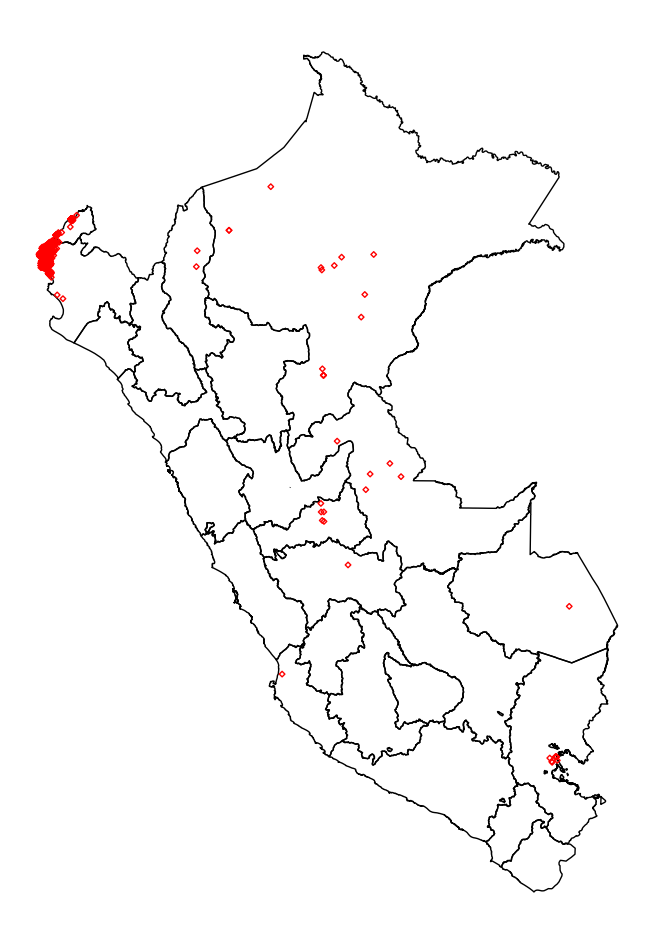

In [15]:
# Forma correcta

# dividimos por zona
pah17 = pah[pah['zona'] == 17]
pah17 = gpd.GeoDataFrame(geometry = gpd.points_from_xy(
    pah17.este, pah17.norte, crs = 'EPSG:32717'), data = pah17)

pah18 = pah[pah['zona'] == 18]
pah18 = gpd.GeoDataFrame(geometry = gpd.points_from_xy(
    pah18.este, pah18.norte, crs = 'EPSG:32718'), data = pah18)

pah19 = pah[pah['zona'] == 19]
pah19 = gpd.GeoDataFrame(geometry = gpd.points_from_xy(
    pah19.este, pah19.norte, crs = 'EPSG:32719'), data = pah19)

# Re-proyectamos a UTM 18S
pah17_18s = pah17.to_crs("epsg:32718")
pah19_18s = pah19.to_crs("epsg:32718")

# Unimos todo
PAH_f = gpd.pd.concat([pah17_18s, pah18, pah19_18s])


#   MAPA
capa1 = depa_UTM.plot(color = 'none', edgecolor = 'black', figsize=(16,12))
PAH_f.plot(ax = capa1, marker = 'D', edgecolor = 'red', facecolors = 'none',
              markersize = 8, legend = True).set_axis_off()


### Spatial Join: Identifying Departments with Environmental Liabilities (PAH) in Zone 17

In this code, we perform a spatial join (`gpd.sjoin`) to identify which departments in the UTM-projected shapefile (`depa_UTM`) contain environmental liabilities (PAH) located in zone 17 (`pah17_18s`). The spatial join uses the **"contains"** predicate, ensuring that only departments that fully contain PAH points are included. 
- After removing duplicates based on the department identifier (`fid`), a new column `tienepa` is created to indicate if a department has PAH in zone 17. 
- Finally, a choropleth map is generated to visualize the departments that contain PAH, using a red color gradient, and the axes are turned off for a cleaner presentation.


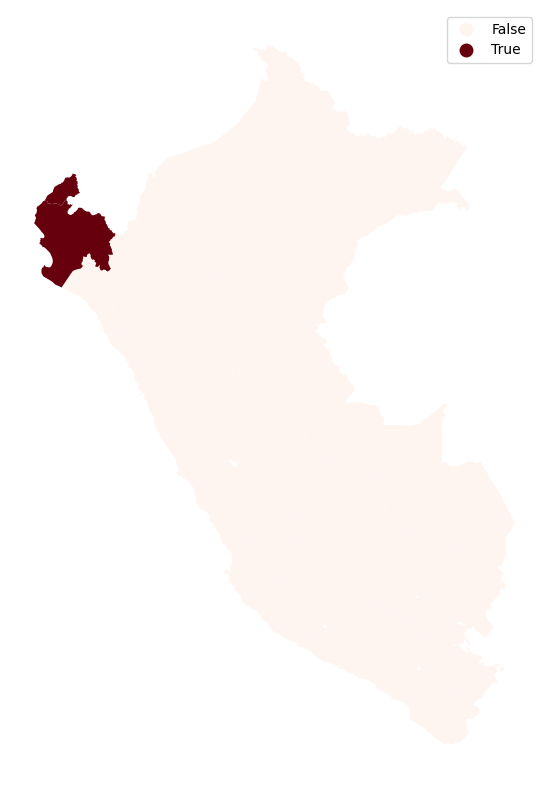

In [17]:
# UNIÓN ESPACIAL 1: DEPARTAMENTOS QUE TIENEN PAH EN ZONA 17
contiene = gpd.sjoin(depa_UTM, pah17_18s,
                     how='left',
                     predicate='contains').drop_duplicates(subset=['fid'],
                                                           keep='first')
contiene['tienepa'] = contiene['zona'] == 17
contiene.plot(column='tienepa', cmap = 'Reds', legend = True, figsize=(14,10)).set_axis_off()


### Spatial Join: Selecting ENAHO Points Within the Amazonas Region

This code performs a spatial join (`gpd.sjoin`) to select the ENAHO points (`enaho_xy`) that fall within the boundaries of the Amazonas department (`depa_wgs`). The join uses the **"within"** predicate to identify ENAHO points that are spatially located inside Amazonas. A new column `amazonas` is created, where the value is `True` if the point belongs to the department with code `01` (Amazonas). The code then plots the departmental boundaries in black and overlays the ENAHO points, coloring those within Amazonas in red, while turning off the axis for cleaner visualization.


    longitud   latitud  altitud  rowid                    geometry  \
0 -77.878113 -6.228634     2417      1  POINT (-77.87811 -6.22863)   
1 -77.878929 -6.228109     2417      2  POINT (-77.87893 -6.22811)   
2 -77.876945 -6.230203     2360      3  POINT (-77.87695 -6.23020)   
3 -77.873817 -6.217993     2394      4  POINT (-77.87382 -6.21799)   
4 -77.873970 -6.222684     2352      5  POINT (-77.87397 -6.22268)   

   index_right  fid  objectid ccdd   nombdep                     fuente  \
0          0.0  1.0       1.0   01  AMAZONAS  INEI - CPV2017 RESULTADOS   
1          0.0  1.0       1.0   01  AMAZONAS  INEI - CPV2017 RESULTADOS   
2          0.0  1.0       1.0   01  AMAZONAS  INEI - CPV2017 RESULTADOS   
3          0.0  1.0       1.0   01  AMAZONAS  INEI - CPV2017 RESULTADOS   
4          0.0  1.0       1.0   01  AMAZONAS  INEI - CPV2017 RESULTADOS   

  tematica  id_geograf  coddepa  amazonas  
0      T10   2010000.0      1.0      True  
1      T10   2010000.0      1.0      Tru

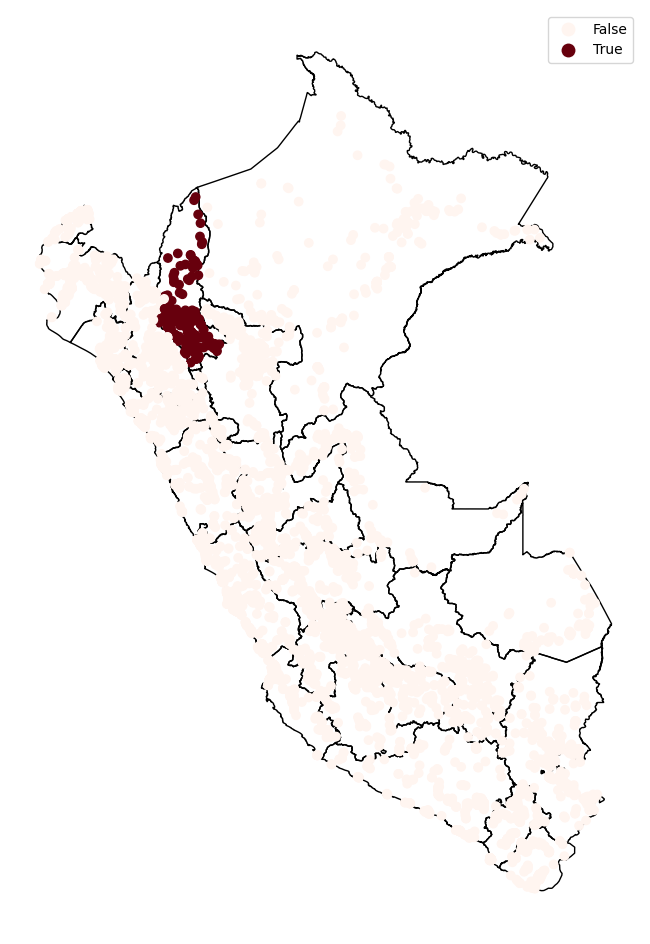

In [18]:
# UNIÓN ESPACIAL 2: SELECCIONAR CCPP ENAHO DENTRO DE AMAZONAS
dentro = gpd.sjoin(enaho_xy,
                   depa_wgs,
                   how = 'left',
                   predicate = 'within')

dentro['amazonas'] = dentro['ccdd'] == "01"
print(dentro.head())

capa1 = depa_wgs.plot(color = 'none', edgecolor = 'black', figsize=(16,12))
dentro.plot(ax = capa1,
            column = "amazonas",
            cmap = "Reds",
              legend = True).set_axis_off()



C:\Users\Usuario\AppData\Local\Temp\ipykernel_9416\1434234330.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid['geometry'] = centroid['geometry'].centroid.to_crs(4326)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9416\1434234330.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  puno_xy['geometry'] = centroid['geometry'].centroid.to_crs(4326)


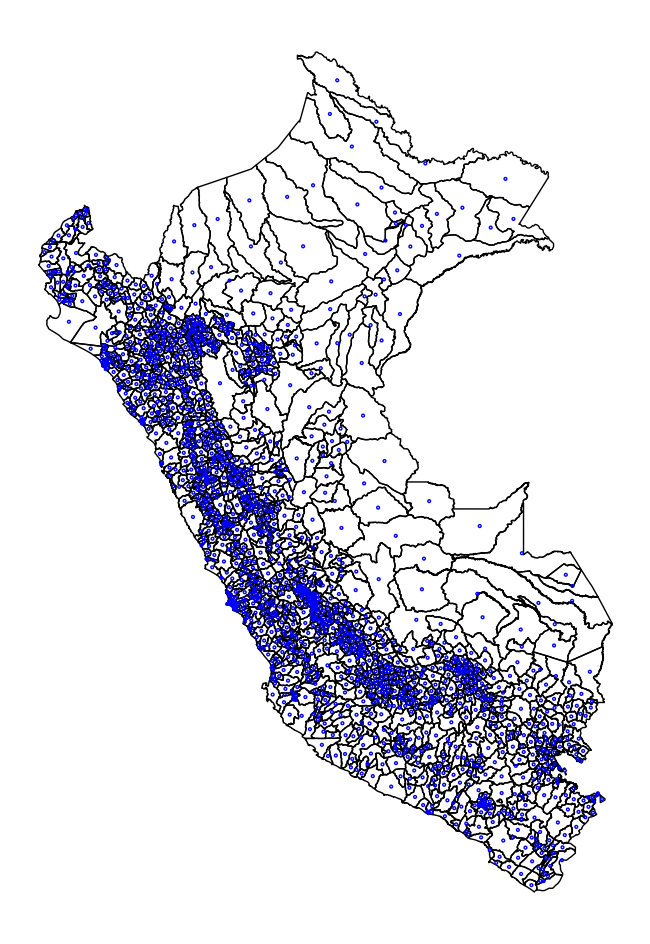

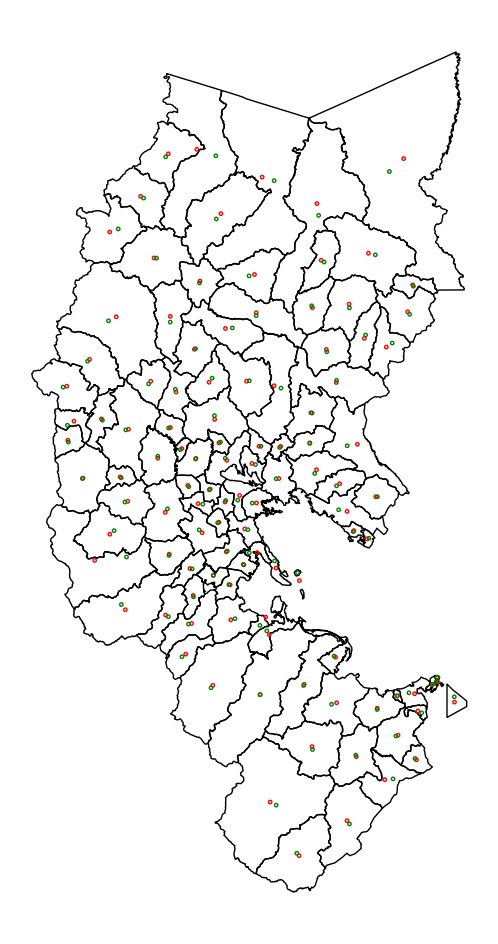

In [19]:
# Buffer alrededor de centroides de Loreto

# Cargar el shapefile desde Google Drive

#csv_path = './Ejercicio_buffer'


#dir = '/content/drive/My Drive/QGIS_QLAB/Sesion3/Ejercicio_buffer'

dir = './Ejercicio_buffer'
distritos = gpd.read_file(dir + '/Distrito_INEI_2017.shp')
distritos = distritos.to_crs(4326)

# Crear centroide
centroid = distritos.copy()
centroid['geometry'] = centroid['geometry'].centroid.to_crs(4326)


#print(distritos.head())
# Mapa
capa1 = distritos.plot(color = 'none', edgecolor = 'black', figsize=(16,12))
centroid.plot(ax = capa1,
              marker = 'o',
              edgecolor = 'blue',
              facecolors = 'none',
              markersize = 4,
              legend = True).set_axis_off()


# Puno: centroide dentro de
puno = distritos[distritos['nombdep'] == "PUNO"]
puno_xy = puno.copy()
puno_xy['geometry'] = centroid['geometry'].centroid.to_crs(4326)

puno_xy2 = puno.copy()
puno_xy2["geometry2"] = puno_xy2.representative_point()

  # Mapa
capa1 = puno.plot(color = 'none', edgecolor = 'black', figsize=(16,12))
puno_xy.plot(ax = capa1,
                marker = 'o',
                edgecolor = 'red',
                facecolors = 'none',
                markersize = 6,
                legend = True).set_axis_off()

puno_xy2.set_geometry('geometry2').plot(ax = capa1,
                marker = 'o',
                edgecolor = 'green',
                facecolors = 'none',
                markersize = 6,
                legend = True).set_axis_off()




C:\Users\Usuario\AppData\Local\Temp\ipykernel_9416\667081770.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer = puno_xy.geometry.buffer(0.1)


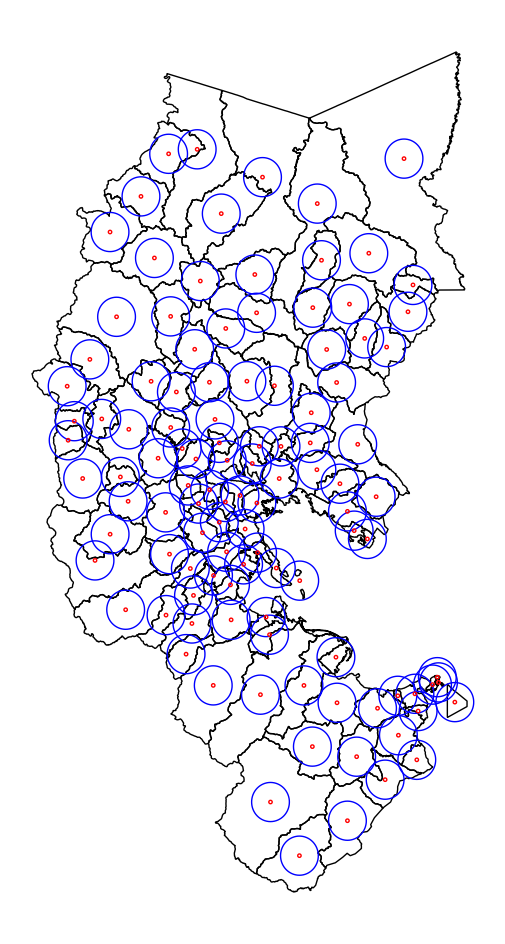

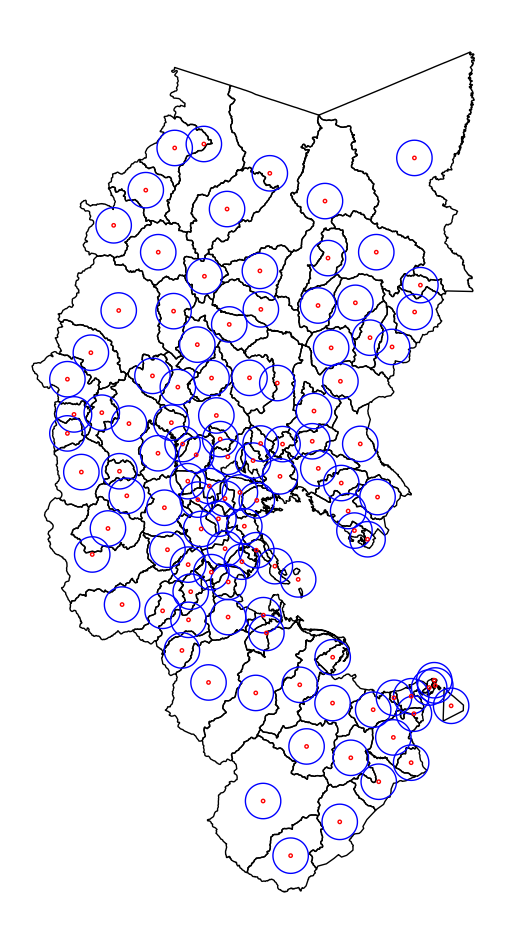

In [20]:
# Buffer 0.1 grados (aprox 11 km)
buffer = puno_xy.geometry.buffer(0.1)

capa1 = puno.plot(color = 'none', edgecolor = 'black', figsize=(16,12))
capa2 = buffer.plot(ax = capa1, color = 'none', edgecolor = 'blue')
puno_xy.plot(ax = capa2,
                marker = 'o',
                edgecolor = 'red',
                facecolors = 'none',
                markersize = 6,
                legend = True).set_axis_off()

# Buffer de 10km: requiere cambiar de proyeccion
puno_utm = puno.to_crs(32718)
punoxy_utm = puno_xy.to_crs(32718)
buffer = punoxy_utm.geometry.buffer(10000)

capa1 = puno_utm.plot(color = 'none', edgecolor = 'black', figsize=(16,12))
capa2 = buffer.plot(ax = capa1, color = 'none', edgecolor = 'blue')
punoxy_utm.plot(ax = capa2,
                marker = 'o',
                edgecolor = 'red',
                facecolors = 'none',
                markersize = 6,
                legend = True).set_axis_off()

